<a href="https://colab.research.google.com/github/FatimaMirandap/DataMiningProjects/blob/main/4ESTGUARDPROJECT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Data preparation**



Dataset

In [ ]:
import pandas as pd
import numpy as np
import random

# Cargando el archivo CSV
file_path = '/content/road_data2.csv'  # Asegúrate de tener el camino correcto al archivo
data = pd.read_csv(file_path)

# Definiendo los años de interés
anios = list(range(2023, 2027))

# Creando un DataFrame para almacenar los datos simulados
simulated_data = pd.DataFrame()

# Definiendo opciones para los campos simulados
patrones_tala = ["Tala Selectiva", "Tala en Franjas", "Roza y Quema", "Tala Total"]
tipos_vegetacion = ["Bosque Tropical", "Bosque Templado", "Bosque Boreal"]
condiciones_terreno = ["Llano", "Inclinado", "Montañoso"]

for anio in anios:
    temp_data = []
    for _, row in data.iterrows():
        # Ajustando la probabilidad de deforestación según elevación y año
        prob_deforestacion = min(0.1 + (anio - 2023) * 0.05 + row['Elevation'] * 0.0001, 1.0)

        # Generando datos simulados
        area_talada = 1 if random.random() < prob_deforestacion else 0
        tipo_vegetacion = random.choice(tipos_vegetacion)
        patron_tala = random.choice(patrones_tala) if area_talada == 1 else "NO APLICA"
        camino_acceso = 1 if row['Elevation'] < 300 and area_talada == 1 else 0
        cambio_vegetacion = "Reduccion" if area_talada == 1 else ("Aumento" if random.random() < 0.1 else "Ninguna")
        area_deforestada = random.uniform(0, 5) if area_talada == 1 else 0
        impacto_fauna = "Alto" if area_deforestada > 2 else ("Medio" if area_deforestada > 0 else "Bajo")
        condiciones_terreno = random.choice(condiciones_terreno)
        signos_regeneracion = 1 if anio > 2023 and random.random() < 0.2 else 0

        # Añadiendo la fila a la lista temporal
        temp_data.append({
            "Anio": anio,
            "Latitude": row["Latitude"],
            "Longitude": row["Longitude"],
            "Elevation": row["Elevation"],
            "Areas Taladas": area_talada,
            "Patrones de Tala": patron_tala,
            "Caminos de Acceso": camino_acceso,
            "Cambio en Vegetacion": cambio_vegetacion,
            "Tipo de Vegetacion": tipo_vegetacion,
            "Area Deforestada (ha)": area_deforestada,
            "Impacto en la Fauna": impacto_fauna,
            "Condiciones del Terreno": condiciones_terreno,
            "Signos de Regeneracion": signos_regeneracion
        })

    # Añadiendo los datos de la lista temporal al DataFrame principal usando concat
    simulated_data = pd.concat([simulated_data, pd.DataFrame(temp_data)], ignore_index=True)

# Revisando los primeros registros del DataFrame generado
simulated_data.head()

,Anio,Latitude,Longitude,Elevation,Areas Taladas,Patrones de Tala,Caminos de Acceso,Cambio en Vegetacion,Tipo de Vegetacion,Area Deforestada (ha),Impacto en la Fauna,Condiciones del Terreno,Signos de Regeneracion
0,2023,17.75478,-96.31917,153.580017,0,NO APLICA,0,Ninguna,Bosque Templado,0.000000,Bajo,Inclinado,0
1,2023,17.75071,-96.32142,204.598724,0,NO APLICA,0,Ninguna,Bosque Boreal,0.000000,Bajo,i,0
2,2023,17.74930,-96.32380,229.968765,0,NO APLICA,0,Ninguna,Bosque Tropical,0.000000,Bajo,i,0
3,2023,17.75151,-96.32493,230.278259,1,Tala en Franjas,1,Reduccion,Bosque Tropical,3.987384,Alto,i,0
4,2023,17.75021,-96.32595,247.312531,0,NO APLICA,0,Ninguna,Bosque Tropical,0.000000,Bajo,i,0


In [ ]:
# Guardando el DataFrame en un archivo CSV
output_file_path = 'simulated_deforestation_data.csv'  # Puedes cambiar el nombre del archivo según lo necesites
simulated_data.to_csv(output_file_path, index=False)
print(f"Datos guardados en '{output_file_path}'")

Datos guardados en 'simulated_deforestation_data.csv'


### Analysis
Here is an analysis of how the data obtained from the imagery can be manipulated. It does not show real results, it is just for future knowledge.

In [ ]:
import pandas as pd

file_path = '/content/simulated_deforestation_data SI.csv'
data = pd.read_csv(file_path)

data.head()

,Anio,Latitude,Longitude,Elevation,Areas Taladas,Patrones de Tala,Caminos de Acceso,Cambio en Vegetacion,Tipo de Vegetacion,Area Deforestada (ha),Impacto en la Fauna,Condiciones del Terreno,Signos de Regeneracion
0,2023,17.75478,-96.31917,153.580017,0,NO APLICA,0,Ninguna,Bosque Templado,0.000000,Bajo,Inclinado,0
1,2023,17.75071,-96.32142,204.598724,0,NO APLICA,0,Ninguna,Bosque Boreal,0.000000,Bajo,i,0
2,2023,17.74930,-96.32380,229.968765,0,NO APLICA,0,Ninguna,Bosque Tropical,0.000000,Bajo,i,0
3,2023,17.75151,-96.32493,230.278259,1,Tala en Franjas,1,Reduccion,Bosque Tropical,3.987384,Alto,i,0
4,2023,17.75021,-96.32595,247.312531,0,NO APLICA,0,Ninguna,Bosque Tropical,0.000000,Bajo,i,0


In [ ]:
missing_values = data.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
if not missing_values_summary.empty:
    print("Resumen de valores nulos por columna:")
    print(missing_values_summary)
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [ ]:
# Normalizar el texto y eliminar espacios en blanco adicionales
columns_to_normalize = ['Patrones de Tala', 'Cambio en Vegetacion', 'Tipo de Vegetacion', 'Impacto en la Fauna', 'Condiciones del Terreno']

for column in columns_to_normalize:
    data[column] = data[column].str.lower().str.strip()

# Corregir posibles errores tipográficos o inconsistencias
# (Agrega código aquí según sea necesario)

# Recopilar valores únicos después de la normalización
unique_values = {
    column: data[column].unique() for column in columns_to_normalize
}

# Imprimir valores únicos
for column, values in unique_values.items():
    print(f'Valores únicos en {column}: {values}')

Valores únicos en Patrones de Tala: ['no aplica' 'tala en franjas' 'tala selectiva' 'roza y quema'
 'tala total']
Valores únicos en Cambio en Vegetacion: ['ninguna' 'reduccion' 'aumento']
Valores únicos en Tipo de Vegetacion: ['bosque templado' 'bosque boreal' 'bosque tropical']
Valores únicos en Impacto en la Fauna: ['bajo' 'alto' 'medio']
Valores únicos en Condiciones del Terreno: ['inclinado' 'i']


In [ ]:
# Reemplazar "i" con "desconocido" en la columna "Condiciones del Terreno"
data['Condiciones del Terreno'] = data['Condiciones del Terreno'].replace('i', 'desconocido')

# Verificar los tipos de datos de cada columna
data_types = data.dtypes

# Imprimir los tipos de datos
print("Tipos de datos de cada columna:")
data_types

Tipos de datos de cada columna:


Anio                         int64
Latitude                   float64
Longitude                  float64
Elevation                  float64
Areas Taladas                int64
Patrones de Tala            object
Caminos de Acceso            int64
Cambio en Vegetacion        object
Tipo de Vegetacion          object
Area Deforestada (ha)      float64
Impacto en la Fauna         object
Condiciones del Terreno     object
Signos de Regeneracion       int64
dtype: object

In [ ]:
descriptive_statistics = data.describe().transpose()
# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas de las variables numéricas:")
descriptive_statistics

Estadísticas descriptivas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Anio,1236.0,2024.500000,1.118487,2023.000000,2023.750000,2024.50000,2025.250000,2026.000000
Latitude,1236.0,17.453217,0.188155,17.105060,17.308900,17.45198,17.600760,17.754780
Longitude,1236.0,-96.476866,0.095389,-96.643090,-96.525560,-96.50761,-96.385460,-96.304380
Elevation,1236.0,2041.522099,724.461826,153.580017,1626.533936,2146.94751,2624.526611,2979.895264
Areas Taladas,1236.0,0.385113,0.486819,0.000000,0.000000,0.00000,1.000000,1.000000
Caminos de Acceso,1236.0,0.006472,0.080223,0.000000,0.000000,0.00000,0.000000,1.000000
Area Deforestada (ha),1236.0,0.948644,1.505052,0.000000,0.000000,0.00000,1.680781,4.997518
Signos de Regeneracion,1236.0,0.154531,0.361603,0.000000,0.000000,0.00000,0.000000,1.000000


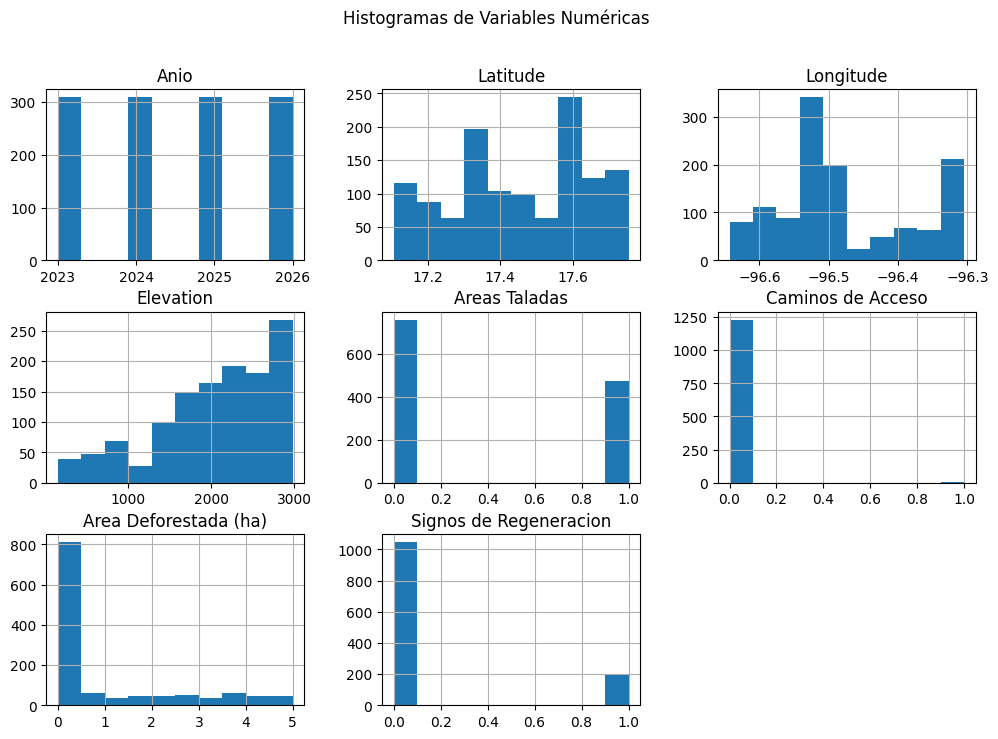

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv(file_path)
data.hist(figsize=(12, 8))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()